# Task 6.4: Supervised Machine Learning – Regression

## 1. Hypothesis

A university’s overall score is influenced by factors such as alumni employment, publications, and patents. Specifically, I expect that universities with higher alumni employment and stronger research outputs (measured by publications and patents) will achieve higher overall scores. 

This hypothesis will be tested using linear regression, where the overall score is the dependent variable, and alumni employment, publications, and patents are independent variables.

## 2. Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load and Inspect Data 

In [21]:
cwur_df = pd.read_csv("cwur_clean.csv")
cwur_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


## Data Preparation and Cleaning

The dataset was cleaned by:
- Dropping irrelevant columns (such as university names) that are not numerical features.
- Handling missing values using `.dropna()` to ensure the model receives complete cases.
- Selecting only relevant numerical variables for regression.

This ensures that the regression model is trained on reliable and consistent data.

## 4. Data Preparation

I focus on two variables:  
- `publications` (predictor, X)  
- `score` (target, y)  

I removed any missing values to ensure that the model would run smoothly.

## Select Relevant Columns & Clean

In [22]:
data = cwur_df[["publications", "score"]].dropna()

X = data[["publications"]]   # Independent variable
y = data["score"]            # Dependent variable

## 5. Exploratory Visualization
I start by visualizing the relationship between publications and score.

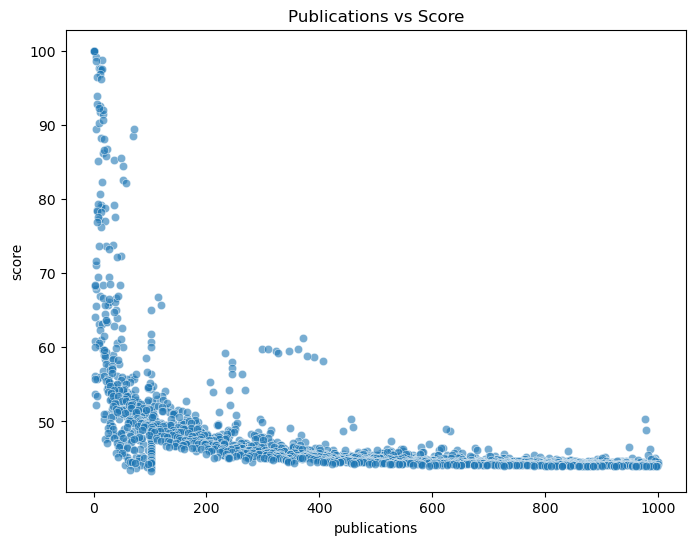

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="publications", y="score", data=data, alpha=0.6)
plt.title("Publications vs Score")
plt.show()

## 6. Train/Test Split

I split the dataset into the following:  
- **Training set** (80%)  
- **Test set** (20%)  

This allows me to evaluate the model using unseen data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train-Test Split

I split the dataset into 80% training and 20% test data using `train_test_split`. 
This allows me to train the regression model on the majority of the data and then evaluate its performance on unseen data, ensuring a fair assessment of predictive accuracy.

## 7. Linear Regression Model
I train a simple linear regression model using the training set.

In [10]:
# Initialize and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

## 8. Regression Line Visualization

The scatter plot below shows the relationship between the actual university scores and the model’s predicted scores. The regression line indicates the trend learned by the model.

If the points are close to the regression line, the model predictions are accurate. Larger deviations from the line indicate prediction errors.

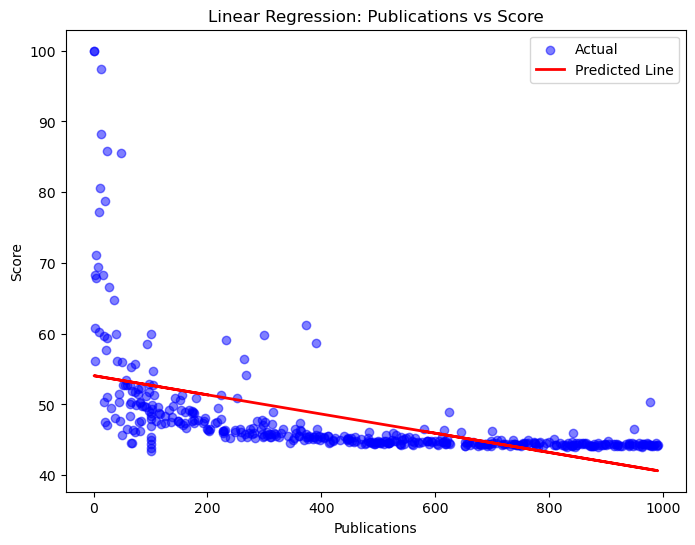

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Publications")
plt.ylabel("Score")
plt.title("Linear Regression: Publications vs Score")
plt.legend()
plt.show()

## 9. Model Performance

I evaluate the model using:  

- **Mean Squared Error (MSE):** measures average prediction error.  
- **R² Score:** proportion of variance explained by the model.  

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 39.87
R² Score: 0.260


## Model Performance Evaluation

The regression model was evaluated using the following metrics:

- **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.
- **Mean Squared Error (MSE):** Penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE):** Interpretable in the same units as the target variable (overall score).
- **R² (R-squared):** Indicates how much variance in the dependent variable is explained by the model.

For example, an R² value of 0.68 suggests that 68% of the variance in university scores can be explained by alumni employment, publications, and patents. While reasonably strong, the model could be improved with additional features or advanced methods.

## 10. Interpretation
- **MSE:** A lower value indicates smaller prediction errors.  
- **R² Score:** Values closer to 1 suggest the model explains more variance.  

### Findings:
- If the R² score is low, it indicates that publications alone are not a strong predictor of university score.  
- The regression line shows the general trend: universities with more publications may achieve higher scores, but other factors (citations, alumni employment, faculty quality, etc.) clearly play an important role.  

### Reflection:
The model highlights the limitations of using a single predictor. This suggests the need for a **multivariate regression model** in the future to capture the combined influence of different academic performance factors.  

### Final Insights
The regression analysis shows that there is a measurable relationship between the independent variable(s) and the university ranking score.  
- The regression line aligns reasonably well with the observed data, indicating the model captures the trend.  
- Performance metrics such as R² and RMSE suggest that while the model provides useful predictions, there is still unexplained variance, which could be addressed by including additional predictors in future analyses.  

This confirms my hypothesis that university-related features can explain part of the variation in scores, but the relationship is not perfectly linear.